# Libraries

To create a decision tree model, we will use the following libraries:

In [1]:
#ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from graphviz import Source

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sb
import matplotlib.pyplot as plt

# Importing test and train data

From the revised oversampling notebook, we will import the test and train data. the train data has been oversampled to balance the quantity of each emotion.

In [2]:
#importing train and test split
train_set = pd.read_csv('./outputs/train_set_ov2.csv')
test_set = pd.read_csv('./outputs/test_set_ov2.csv')

#Split into features and target; x = features, y = target
X_train = train_set.iloc[:, 1:]
y_train = train_set['label']

X_test = test_set.iloc[:, 1:]
y_test = test_set['label']

#combining test and train set for cross validation
x = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

# Decision Tree Model Testing

We will first test the model where max_depth = 10. 

In [3]:
#create a decision tree model
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state=42, criterion ="entropy")


In [4]:
#decision tree training
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [5]:
#creates a visualization of the decision tree
feature_names = X_train.columns
labels = tree_clf.classes_
export_graphviz(
    tree_clf,
    out_file="FER_ov2.dot",
    feature_names = feature_names,
    class_names=labels,
    rounded = True,
    filled=True,
    special_characters=True
)

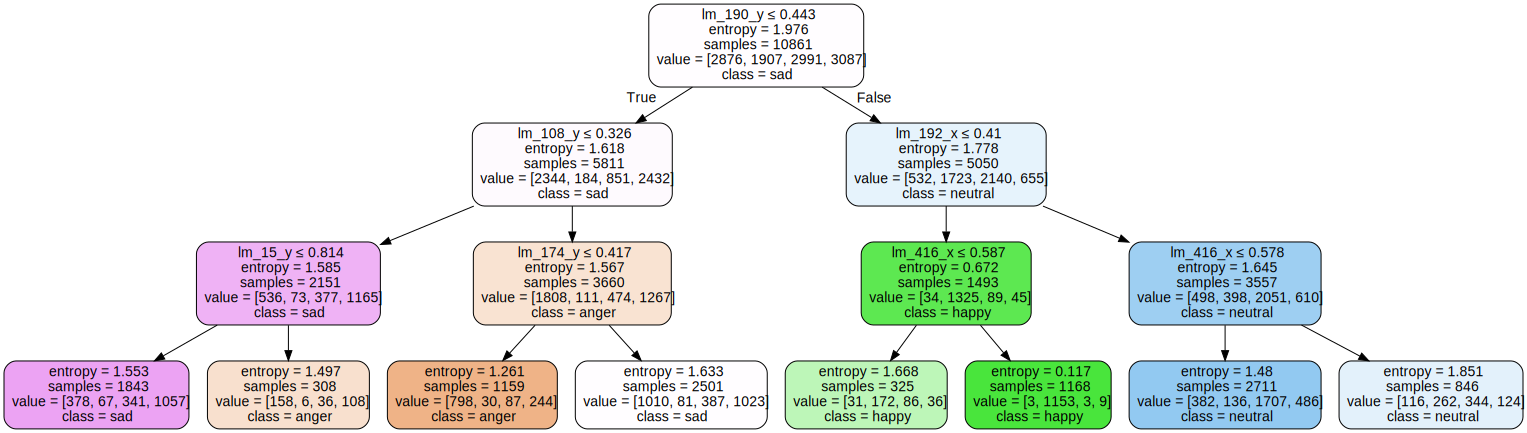

In [6]:
#displays the decision tree model visualization

graph = Source.from_file("FER_ov2.dot")
graph.render("FER_ov2")
graph

# Nature of Decision Tree

Due to the large amount of columns, the decision tree is very large and difficult to interpret once the maximum depth increases in size. However, since it is still a decision tree, it is still possible to interpret the tree and trace the path of the decision tree when a new data point is inputted.

# Testing the Model
We can observe the performance of the model using the confusion matrix and evaluation metrics.

In [7]:

cross_val_score(tree_clf,X_train,y_train, cv=5, scoring="accuracy")



array([0.42337782, 0.6786372 , 0.50276243, 0.62615101, 0.57090239])

In [8]:
y_emotion_predict = cross_val_predict(tree_clf, X_train, y_train, cv=3)

In [9]:
cm = confusion_matrix(y_train,y_emotion_predict)
cm

array([[1552,   45,  490,  789],
       [  65, 1357,  363,  122],
       [ 408,  123, 2014,  446],
       [1248,   70,  585, 1184]], dtype=int64)

In [10]:
#accuracy score
acs = accuracy_score(y_train,y_emotion_predict)

#precision score
#precision should be very high to avoid false positives
ps =precision_score(y_train,y_emotion_predict, average = "macro")
#recall score
rs = recall_score(y_train, y_emotion_predict, pos_label='e',average='macro')
#f1 score
fs =f1_score(y_train, y_emotion_predict, pos_label='e', average='macro')

print("Accuracy Score: ", acs)
print("Precision Score: ", ps)
print("Recall Score: ", rs)
print("F1 Score: ", fs)

Accuracy Score:  0.5622870822207899
Precision Score:  0.5935886464772332
Recall Score:  0.5770311392430936
F1 Score:  0.5814278086441829


In [11]:
#Test set
test_pred = tree_clf.predict(X_test)
cm = confusion_matrix(y_test,test_pred)
cm

array([[ 222,    2,    9,  285],
       [  29, 1109,  223,  126],
       [  23,   12,  286,   82],
       [  45,    3,    4,  255]], dtype=int64)

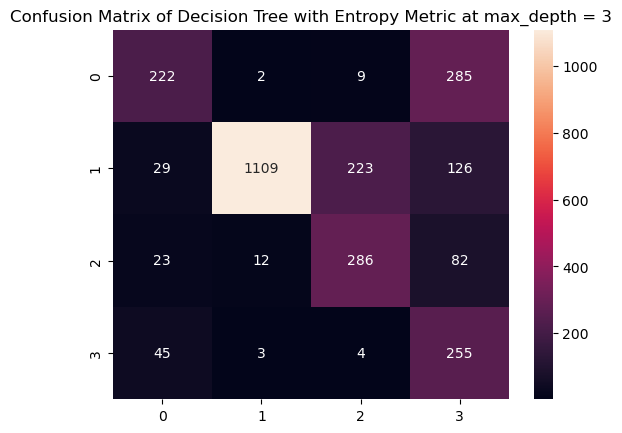

In [12]:
cmg = sb.heatmap(cm, annot=True, fmt='g')
plt.title("Confusion Matrix of Decision Tree with Entropy Metric at max_depth = 3")
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [13]:
acs_test = accuracy_score(y_test,test_pred)
ps_test = precision_score(y_test,test_pred, average = "macro")
rs_test = recall_score(y_test,test_pred,  average = "macro")
fs_test = f1_score(y_test,test_pred,  average = "macro")

print("Accuracy Score: ", acs_test)
print("Precision Score: ", ps_test)
print("Recall Score: ", rs_test)
print("F1 Score: ", fs_test)

Accuracy Score:  0.6895027624309392
Precision Score:  0.6424072212911252
Recall Score:  0.678666161739403
F1 Score:  0.6202723524386422


# Graphical Method for finding the best value of max_depth

In [14]:
max_depth = range(5, 26)
acc_test = []
acc_train = []
prec_test = []
prec_train = []
rec_test = []
rec_train = []
f1_test = []
f1_train = []

for i in max_depth:
    tree_clf = DecisionTreeClassifier(max_depth = i,random_state=42, criterion ="entropy")
    tree_clf.fit(X_train,y_train)
    y_emotion_predict = cross_val_predict(tree_clf, X_train, y_train, cv=3)
    #append to each list
    acc_train.append(accuracy_score(y_train,y_emotion_predict))
    prec_train.append(precision_score(y_train,y_emotion_predict, average = "macro"))
    rec_train.append(recall_score(y_train, y_emotion_predict,  average='macro'))
    f1_train.append(f1_score(y_train, y_emotion_predict,  average='macro'))
    test_pred = tree_clf.predict(X_test)
    f1_test.append(f1_score(y_test,test_pred, average = "macro"))
    acc_test.append(accuracy_score(y_test,test_pred))
    prec_test.append(precision_score(y_test,test_pred, average = "macro"))
    rec_test.append(recall_score(y_test,test_pred,  average='macro'))
    print('Done: ', i)

Done:  5
Done:  6
Done:  7
Done:  8
Done:  9
Done:  10
Done:  11
Done:  12
Done:  13
Done:  14
Done:  15
Done:  16
Done:  17
Done:  18
Done:  19
Done:  20
Done:  21
Done:  22
Done:  23
Done:  24
Done:  25


# Comparison of Decision Tree Models

The graphs below show the performance of the decision tree models with different max_depth values.

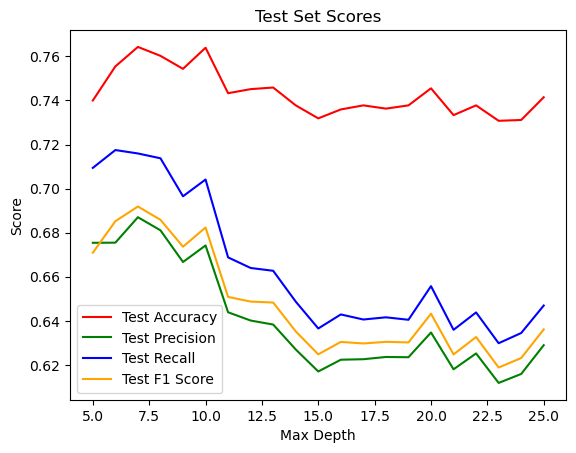

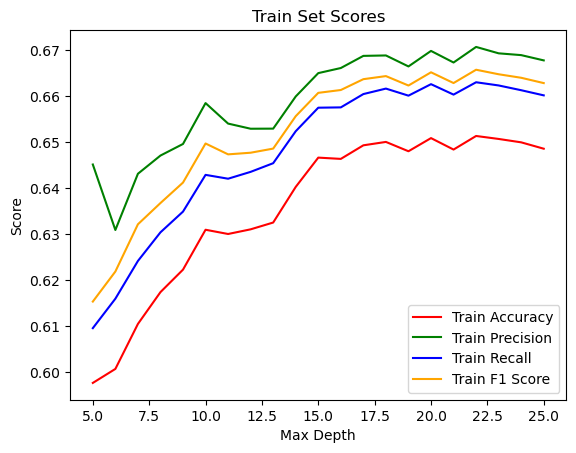

In [15]:
#plotting the accuracy, precision, recall and f1 score of test set

plt.plot(max_depth, acc_test, label = 'Test Accuracy', color = 'red')
plt.plot(max_depth, prec_test, label = 'Test Precision', color = 'green')
plt.plot(max_depth, rec_test, label = 'Test Recall', color = 'blue')
plt.plot(max_depth, f1_test, label = 'Test F1 Score', color = 'orange') 

plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Test Set Scores')
plt.legend()
plt.savefig('test_scores_ov2.png', dpi=300, bbox_inches='tight')
plt.show()

#plotting the accuracy, precision, recall and f1 score of train set

plt.plot(max_depth, acc_train, label = 'Train Accuracy', color = 'red')
plt.plot(max_depth, prec_train, label = 'Train Precision', color = 'green')
plt.plot(max_depth, rec_train, label = 'Train Recall', color = 'blue')
plt.plot(max_depth, f1_train, label = 'Train F1 Score', color = 'orange')

plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Train Set Scores')
plt.legend()
plt.savefig('train_scores_ov2.png', dpi=300, bbox_inches='tight')
plt.show()

# Selecting the best model

The criteria best model is the one with the highest F1 score.

In [16]:
#get the depth of the tree with the highest F1 score using index

best_depth = max_depth[f1_test.index(max(f1_test))]
best_depth

7

# Rerunning the model with the best max_depth value

We will rerun the model with the best max_depth value to observe the performance of the model.

In [17]:
#rerun the model with the best depth

tree_clf = DecisionTreeClassifier(max_depth = best_depth,random_state=42, criterion ="entropy")

tree_clf.fit(X_train,y_train)

test_pred = tree_clf.predict(X_test)



# Validation of the Model

In [18]:
# k-fold cross validation

cross_val_score(tree_clf,X_train,y_train, cv=5, scoring="accuracy")

array([0.492867  , 0.70994475, 0.59530387, 0.6611418 , 0.6247698 ])

# Evaluation Metrics

In [19]:
# get the accuracy, precision, recall and f1 score of the best model

acs_test = accuracy_score(y_test,test_pred)
ps_test = precision_score(y_test,test_pred, average = "macro")
rs_test = recall_score(y_test,test_pred,  average = "macro")
fs_test = f1_score(y_test,test_pred,  average = "macro")

print("Accuracy Score: ", "{:.2%}".format(acs_test))
print("Precision Score: ", "{:.2%}".format(ps_test))
print("Recall Score: ", "{:.2%}".format(rs_test))
print("F1 Score: ", "{:.2%}".format(fs_test))

Accuracy Score:  76.43%
Precision Score:  68.70%
Recall Score:  71.59%
F1 Score:  69.19%


# Confusion matrix

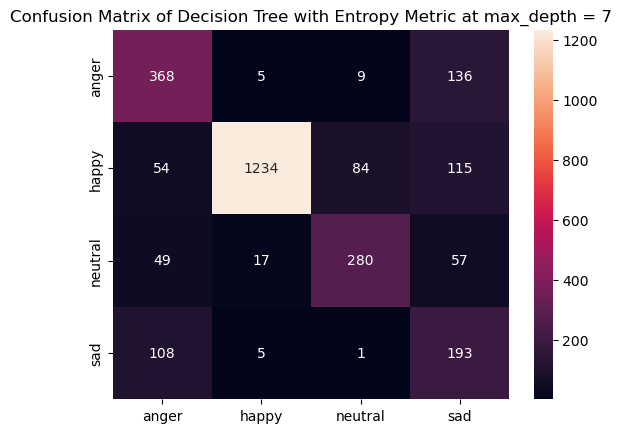

In [20]:
cm = confusion_matrix(y_test,test_pred)

cmg = sb.heatmap(cm, annot=True, fmt='g')

labels = tree_clf.classes_
cmg.set_xticklabels(labels)
cmg.set_yticklabels(labels)

plt.title("Confusion Matrix of Decision Tree with Entropy Metric at max_depth = " + str(best_depth))

plt.savefig('heatmap_best_depth_ov2.png', dpi=300, bbox_inches='tight')

# Decision Tree Model Visualization

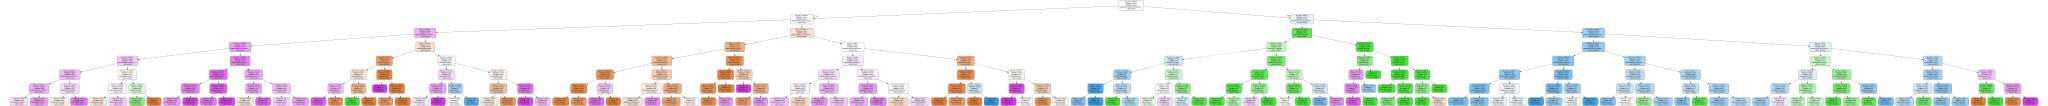

In [21]:
export_graphviz(
    tree_clf,
    out_file="FER_ov2.dot",
    feature_names = feature_names,
    class_names=labels,
    rounded = True,
    filled=True,
    special_characters=True
)

graph = Source.from_file("FER_ov2.dot")
graph.render("FER_best_depth_ov2")
graph